In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

Binned_Data_binning_dpleo_20161225_run025kg5.dat
Binned_Data_binning_dpleo_20170217_run047kg5.dat
Binned_Data_binning_dpleo_20170316_run036kg5.dat
Binned_Data_binning_dpleo_20180121_run076kg5.dat
Binned_Data_binning_dpleo_20200122_run028g.dat
MeanJD_Kittipong_2021.dat
MeanJD_Table12_Beuermann_2014.dat
MeanJD_Table1_Beuermann_2014.dat
MeanJD_Table2_Beuermann_2014.dat
MeanJD_combined.dat
__pycache__/
barycorr.py*
bjd_example.py
dpleo_20140112_run022kg5.dat
dpleo_20140112_run022kg5.in*
jd2bjd_spot_longitude_Beuermann_2014.py*
jd2bjd_spot_longitude_table_1_Beuermann_2014.in*
jd2bjd_spot_longitude_table_1_Beuermann_2014.out
jd2bjd_spot_longitude_table_1_Beuermann_2014.py*
jd2bjd_spot_longitude_table_2_Biermann_1985.in
jd2bjd_spot_longitude_table_2_Biermann_1985.py*
mjd2bjd_dpleo_20140112_run022kg5.py*
quad_fit.dat
spot_longitude_Beuermann_2014.ipynb*
spot_longitude_Beuermann_Kittipong.png
spot_longitude_Data_binning_average_2017.ipynb
spot_longitude_Data_binning_dpleo_20161225_run025kg5.ipy

In [3]:
#Read data ---#1
Input_1 = "MeanJD_Table1_Beuermann_2014.dat"
Data_1   = np.genfromtxt(Input_1)

#Read data ---#2
Input_2 = "MeanJD_Table2_Beuermann_2014.dat"
Data_2   = np.genfromtxt(Input_2)

#Read data ---#3
Input_3 = "MeanJD_Kittipong_2021.dat"
Data_3   = np.genfromtxt(Input_3)

#Input calculation ---#1
N = 2400000

MeanJD_1 = Data_1[:,0] - N
Psi_1 = Data_1[:,1]
Psi_err_1 = Data_1[:,2]

#Input calculation ---#1
MeanJD_2 = Data_2[:,0] - N
Psi_2 = Data_2[:,1]
Psi_err_2 = Data_2[:,2]

#Input calculation ---#3
MeanJD_3 = Data_3[:,0] - N
Psi_3 = Data_3[:,1]
Psi_err_3 = Data_3[:,2]

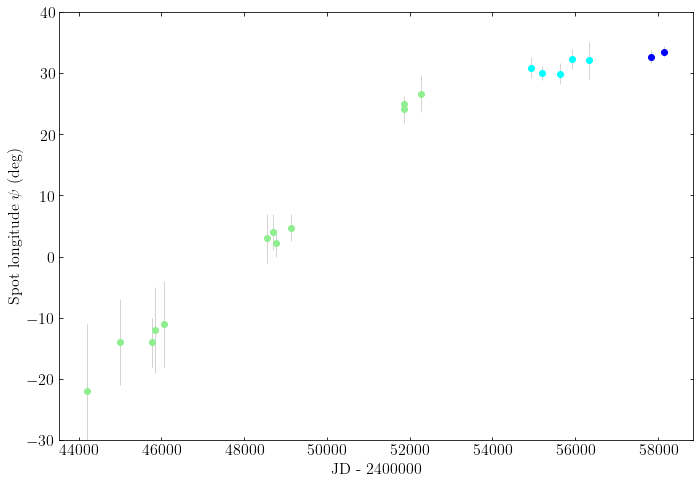

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('JD - '+str(N))
ax0.set_ylabel('Spot longitude $\psi$ (deg)')

ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
#Read data ---#2
Input_2 = "MeanJD_Table2_Beuermann_2014.dat"
Data_2   = np.genfromtxt(Input_2)

#Integer number
N = 2400000

#Input calculation ---#2
MeanJD_2 = Data_2[:,0] - N
Psi_2 = Data_2[:,1]
Psi_err_2 = Data_2[:,2]


In [6]:
x = MeanJD_2
y = Psi_2
dy = Psi_err_2

In [7]:
# define the true objective function
def linear(x, a, b):
    return a * x + b

In [15]:
# curve fit
popt, _ = curve_fit(linear, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = linear(x_line, a, b)

print(x_line)

y = 0.00457 * x + -219.99470
[44214.62 44215.62 44216.62 ... 56330.62 56331.62 56332.62]


[44214.62 44215.62 44216.62 ... 52282.62 52283.62 52284.62]


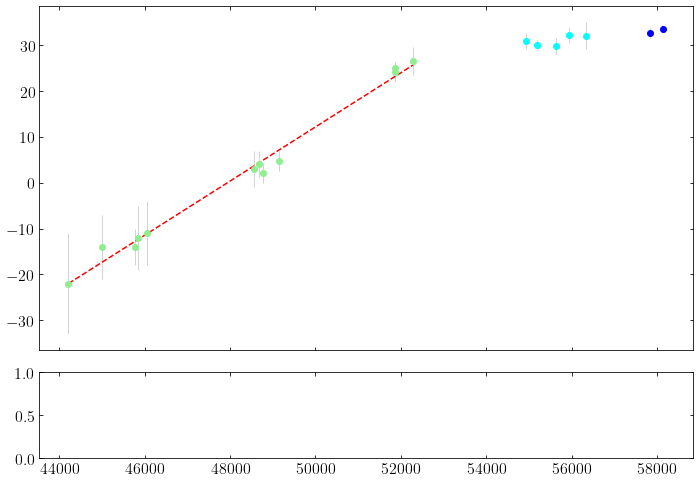

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr=dy, fmt='o', color='lightgreen',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = linear(x_line, a, b)
# create a line plot for the mapping function
ax0.plot(x_line, y_line, '--', color='red')
print(x_line)
plt.show()

In [10]:
#Read data ---#2
Input_12 = "MeanJD_Table12_Beuermann_2014.dat"
Data_12   = np.genfromtxt(Input_12)

#Integer number
N = 2400000

#Input calculation ---#2
MeanJD_12 = Data_12[:,0] - N
Psi_12 = Data_12[:,1]
Psi_err_12 = Data_12[:,2]

In [11]:
x = MeanJD_12
y = Psi_12
dy = Psi_err_12

In [12]:
def objective(x, a, b, c, f):
    return (a * x) + (b * x**2) + (c * x**3) + f

In [13]:
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, f = popt

print(a, b, c, f)

-0.38499388503370385 8.016872346449997e-06 -5.472562357181224e-11 6060.5662859669565


[44214.62 44215.62 44216.62 ... 56330.62 56331.62 56332.62]


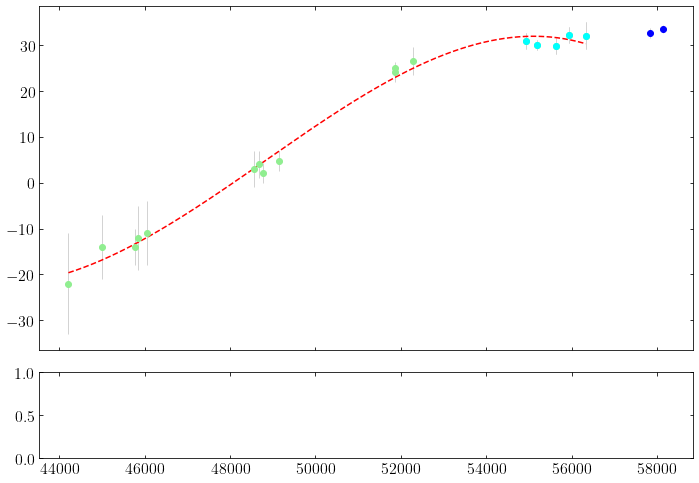

In [14]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr=dy, fmt='o', color='lightgreen',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, f)
# create a line plot for the mapping function
ax0.plot(x_line, y_line, '--', color='red')
print(x_line)
plt.show()